3) Считайте два числа – размер матрицы. Считайте элементы этой матрицы. Если матрица не 
квадратная, посчитайте определитель наибольшей квадратной подматрицы. Таких 
подматриц будет много – выведите на печать максимальное значение определителя для 
них, и отвечающую ему подматрицу.

In [4]:
import numpy as np
import itertools

In [93]:
n = int(input('n: '))
m = int(input('m: '))

mat = np.array([[int(x) for x in input().split(' ')] for y in range(n)])
f = 0
if n > m:
  f = 1

mx_submatrix = mat[0:min(n, m), 0:min(n,m)]
mx_value = np.linalg.det(mx_submatrix)

row = np.arange(max(n, m))
for c in itertools.combinations(row, min(n, m)):
  if f == 0:
    cur = mat[:, c[0]]
  if f == 1:
    cur = mat[c[0], :]
  for i in range(1, len(c)):
    if f == 0:
      vec = mat[:, c[i]]
      cur = np.vstack((cur, vec))
    if f == 1:
      vec = mat[c[i], :]
      cur = np.vstack((cur, vec))

  if f == 0:
    cur = np.transpose(cur)

  cur_value = np.linalg.det(cur)
  if cur_value > mx_value:
    mx_value = cur_value
    mx_submatrix = cur

print(mx_value)
print(mx_submatrix)
  



n: 2
m: 3
5 2 1
1 3 5
23.999999999999993
[[5 1]
 [1 5]]


4) Считайте функцию от символьной переменной t. Считайте два числа – пределы изменения 
t. Выведите график этой функции, а также точками отметьте на графике её экстремумы.

In [135]:
import sympy as sp
import matplotlib.pyplot as plt

formula: t**3-9*t**2-48*t+52
l: -5
r: 11


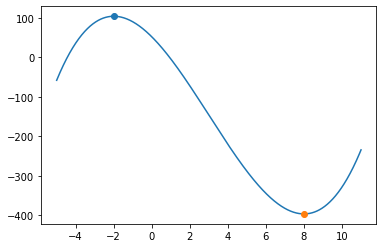

In [153]:
t = sp.Symbol('t')
f = sp.sympify(input('formula: '))
lam_f = sp.lambdify(t, f, 'numpy')

df = sp.diff(f, t)
dx = sp.solve(df)
dy = []
for i in dx:
  dy.append(f.subs(t, i))

l = int(input('l: '))
r = int(input('r: '))

x_vals = np.linspace(l, r, (r - l + 1) * 100)
y_vals = lam_f(x_vals)

plt.plot(x_vals, y_vals)
for x, y in zip(dx, dy):
  plt.scatter(x, y, zorder=2)
plt.show()





9) Решите систему уравнений: 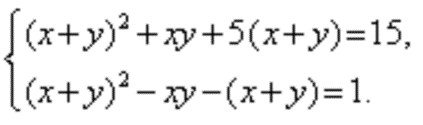


In [155]:
x, y = sp.symbols('x, y')

eq1 = sp.Eq((x+y)**2 + x*y + 5*(x+y), 15)
eq2 = sp.Eq((x+y)**2 - x*y -(x + y), 1)

s = sp.solve([eq1, eq2], [x, y])
print(s)

[(1, 1), (61/16 - 15*sqrt(15)*I/16 + (-2 + sqrt(15)*I)**2/16 - (-2 + sqrt(15)*I)**3/16, -2 + sqrt(15)*I), (61/16 - (-2 - sqrt(15)*I)**3/16 + (-2 - sqrt(15)*I)**2/16 + 15*sqrt(15)*I/16, -2 - sqrt(15)*I)]


12) Решите дифференциальное уравнение 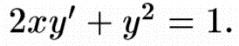Постройте график его решения для 
нескольких значений констант интегрирования.

(C1 + x)/(-C1 + x)


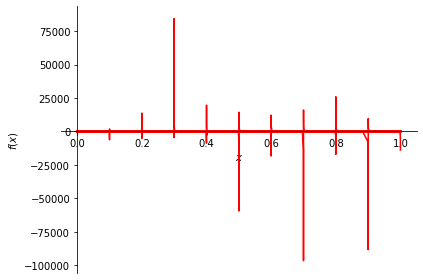

In [218]:
x = sp.symbols('x')
y = sp.symbols('y',cls=sp.Function)

deq = sp.Eq(2*x*y(x).diff(x) + y(x)**2, 1)
f = sp.dsolve(deq)
print(f.rhs)

p = sp.plotting.plot(show=False)
for v in np.arange(0,4,0.1):
    cur = sp.Subs(f.rhs, 'C1', v).doit()
    cur_p = sp.plotting.plot(cur, (x, 0, 1), show=False, line_color='red')
    p.extend(cur_p)
p.show()


2) Постройте график функци f(x) = exp(x)-(x+3)**2+8, и численно найдите корни уравнения 
f(x)=0.

In [219]:
import scipy.optimize as sc

[0.]
[3.55409459]


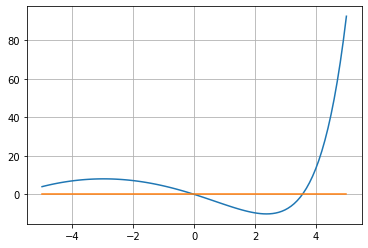

In [229]:
F = (sp.exp(x) - (x+3)**2 + 8)
f = sp.lambdify(x, F)

x_vals = np.linspace(-5,5,100)
f_vals = [f(x) for x in x_vals]
plt.plot(x_vals,f_vals)
plt.grid()
plt.plot([x_vals[0],x_vals[-1]],[0,0])

print(sc.root(f, 0).x)   
print(sc.root(f, 3.8).x)

1) Постройте график функци f(x) = sin(x) - log(x) + 0.25*x, и численно найдите корни уравнения 
f(x)=0.

[2.80511361]


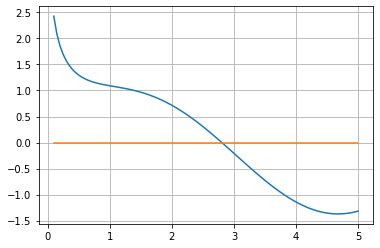

In [235]:
F = (sp.sin(x) - sp.log(x) + 0.25*x)
f = sp.lambdify(x, F)

x_vals = np.linspace(0.1, 5, 100)
f_vals = [f(x) for x in x_vals]
plt.plot(x_vals,f_vals)
plt.grid()
plt.plot([x_vals[0],x_vals[-1]],[0,0])

print(sc.root(f, 3).x)   